In [1]:


# debut *********************************************************************************



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.layers import Dense, Dropout
from matplotlib.pyplot import imshow
%matplotlib inline
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense
print (keras.__version__)
from sklearn.preprocessing import MinMaxScaler
import keras
import pandas
from PIL import Image
from matplotlib.pyplot import imshow
from keras import utils as np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

2024-07-11 15:14:20.488344: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-11 15:14:20.492712: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-11 15:14:20.535186: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 15:14:20.589897: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 15:14:20.590837: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-11 15:14:20.670187: I tensorflow/core/platform/cpu_feature_guard.cc:

3.4.1


#  Chargement des jeux de données

In [4]:

from keras.datasets import mnist


In [6]:

(images_entrainement,labels_entrainement),(images_test,labels_test)=mnist.load_data()


In [8]:

images_entrainement.shape


(60000, 28, 28)

In [10]:

labels_entrainement.shape


(60000,)

In [12]:

images_test.shape


(10000, 28, 28)

In [14]:

labels_test.shape


(10000,)

In [16]:

labels_entrainement[0:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# Préparation des données

In [21]:
# Données d'Entrainement : 
# ici je selectionne par exemple les chiffres 5 et 6

images_entrainement_new, labels_entrainement_new = images_entrainement[(labels_entrainement==5) | (labels_entrainement==6)],\
labels_entrainement[(labels_entrainement==5) | (labels_entrainement==6)]


In [23]:
# nombre d image et dimension

images_entrainement_new.shape


(11339, 28, 28)

In [25]:
# Données d'entrainement:
# je Normalise les données avec reshape et ( 28 * 28 ) = 784

images_entrainement_final = images_entrainement_new.reshape(11339, 784)
images_entrainement_final = images_entrainement_final.astype('float32')/255


In [27]:
# Maintenant je procede de la meme maniere pour les données de test :
# et je selection egalement les chiffres 5 et 6

images_test_new, labels_test_new = images_test[(labels_test==5) | (labels_test==6)],\
labels_test[(labels_test==5) | (labels_test==6)]


In [29]:

images_test_new.shape


(1850, 28, 28)

In [37]:
# Données de test:
# meme chose pour la Normalisation 

images_test_final = images_test_new.reshape(1850, 784)
images_test_final = images_test_final.astype('float32')/255


In [47]:
# Données d'entrainement 
# maintenant ça se corse... un peu !
from keras.utils import to_categorical
# je procede à l'Encodage des étiquettes  afin qu'elles soient utilisable par le réseau de neurones

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Encodage des chiffres
labels_entrainement_new_fit=le.fit_transform(labels_entrainement_new)
catego_labels_entrainement_new=tf.keras.utils.to_categorical(labels_entrainement_new_fit,num_classes=2)


In [49]:
# idem pour les données de test


from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Encodage des chiffres.
labels_test_new_fit=le.fit_transform(labels_test_new)
catego_labels_test_new=tf.keras.utils.to_categorical(labels_test_new_fit,num_classes=2)


## Architecture de reseau

In [52]:


model = Sequential([
   Dense(16, activation='relu', input_shape=(784,)),
   Dropout(rate=0.05),
   Dense(16, activation='relu'),
   Dropout(rate=0.05),
   Dense(16, activation='relu'),
   Dense(2, activation='softmax')
])


/home/jean/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,138 (51.32 KB)

 Trainable params: 13,138 (51.32 KB)

 Non-trainable params: 0 (0.00 B)

## Compilation  du modele

In [57]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Entrainement du modele

In [73]:

history=model.fit(
  x=images_entrainement_final,
  y=catego_labels_entrainement_new,
  shuffle=True,
  epochs=3,
  batch_size=64,
  validation_split=0.3
)

Epoch 1/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8577 - loss: 0.3513 - val_accuracy: 0.9785 - val_loss: 0.0680
Epoch 2/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9730 - loss: 0.0745 - val_accuracy: 0.9774 - val_loss: 0.0649
Epoch 3/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9775 - loss: 0.0602 - val_accuracy: 0.9800 - val_loss: 0.0617


In [75]:
# Pour faire une évaluation

evaluation = model.evaluate(images_test_final, catego_labels_test_new)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9834 - loss: 0.0571


# Tracé des courbes

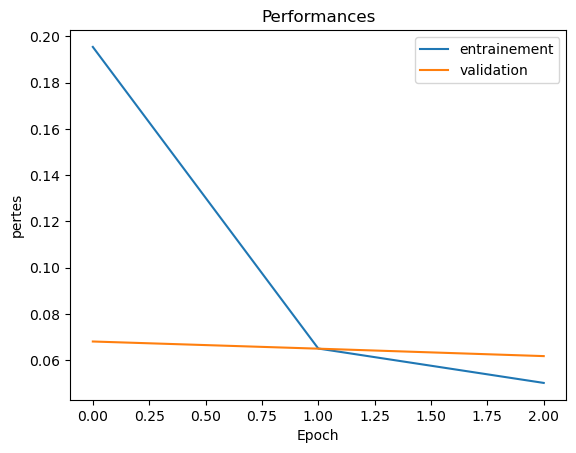

In [78]:
# Affichage des pertes

from matplotlib import pyplot

pyplot.title('Performances')
pyplot.xlabel('Epoch')
pyplot.ylabel('pertes')
pyplot.plot(history.history['loss'], label='entrainement')
pyplot.plot(history.history['val_loss'], label='validation')


pyplot.legend()
pyplot.show()


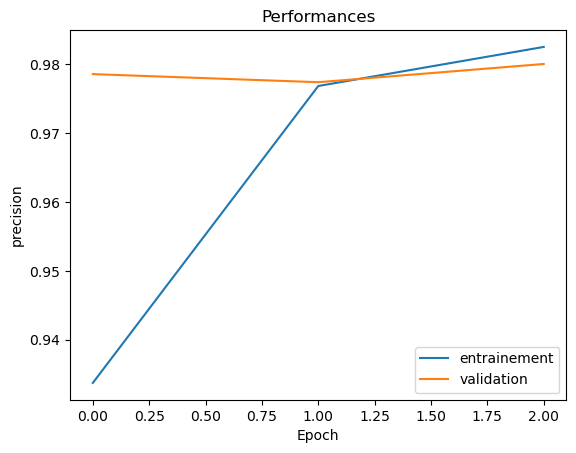

In [80]:
# Affichage de la précision

from matplotlib import pyplot

pyplot.title('Performances')
pyplot.xlabel('Epoch')
pyplot.ylabel('precision')
pyplot.plot(history.history['accuracy'], label='entrainement')
pyplot.plot(history.history['val_accuracy'], label='validation')

pyplot.legend()
pyplot.show()


# Sauvegarde du modele

In [82]:

# Sauvegarde du modele


model.save(r'./classification_2_classes_Keras.hdf5')


# Prédictions

In [84]:
# Pour faire des prédictions

predictions = model.predict(images_test_final,
                            batch_size=10,
                            verbose=0) 


In [86]:
# Keras nous propose une autre méthode intéressante,
# qui peut être utilisée pour prédire les valeurs de nouvelles données 
# (données que le réseau n'a pas encore vues). 
# Comme nous n'avons pas séparé auparavant un tel ensemble,
# mais seulement divisé l'ensemble MNIST en données d'apprentissage et de test,
# nous n'utiliserons qu'un sous-ensemble des données de test.
# La méthode renverra un tableau de bord de 100 éléments.
# Chaque élément indiquera les probabilités que l'entrée appartienne à une classe donnée.


predictions = model.predict(images_test_final[0:100])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [88]:
#  pour voir la prédiction 
# la plupart des valeurs sont de très petits nombres 
# (très faible probabilité que l'image appartienne à cette classe)
# 

predictions[0]


array([7.9069065e-04, 9.9920934e-01], dtype=float32)

In [90]:

np.argmax(predictions[1])


1

In [92]:

labels_test_new[1]


6

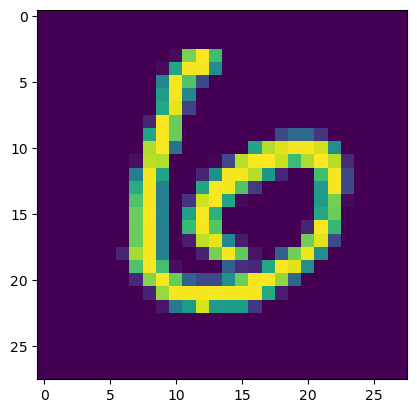

In [94]:
# Vérifions à quoi ressemble l'image. 
# Rappelez-vous que les données d'entrée du réseau ont été aplaties 
# dans le but de creer un vecteur d'une longueur de 784.
# Avant de l'afficher, nous devons le reconvertir à la taille de 28 x 28 pixels. 

plt.imshow(images_test_new[1].reshape(28,28))


In [96]:
# nous avons un tableau à deux dimensions, 
# et non à un vecteur comme avec l'utilisation précédente de argmax,
# Dans notre cas, le long de l'axe y, c'est-à-dire axis = 1. 

# le chiffre 0 représente le 5
# le chiffre 1 représente le 6


la_prediction=np.argmax(predictions, axis=1)


In [98]:
# Dans le cadre d une classification 
# pour remplacer des chiffres par d'autres
# le chiffre 5 est labelisé 0
# le chiffre 6 est labelidé 1



labels_test_new_final = np.zeros(la_prediction.shape)
labels_test_new_final[np.where(la_prediction==1.0)[0]] = 6 # remplace le 6 par 1
labels_test_new_final[np.where(la_prediction==0.0)[0]] = 5 # remplace le 5 par 0
labels_test = labels_test_new_final

labels_test_prediction = labels_test_new_final.T

print('\n labels_test_prediction =',labels_test_prediction[0:10])



 labels_test_prediction = [6. 6. 5. 6. 6. 5. 5. 6. 5. 5.]


In [107]:
labels_test_prediction=labels_test_prediction.astype(np.uint8)

In [108]:
labels_test_prediction[0:100]

array([6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6,
       5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6], dtype=uint8)

In [109]:
labels_test_new[0:100]

array([5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6,
       5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6], dtype=uint8)

In [36]:
# pour verifier ou il y a des erreurs.....si elle existe !

fausse_prediction = np.argmin(np.argmax(predictions, axis=1) == labels_test_new[0:100])
fausse_prediction


0

In [37]:
# Appliquons un softmax, pour obtenir des probabilités
# La somme d une ligne est égale à 1
# La fonction tf.nn.softmax convertit ces logits en probabilités pour chaque classe :
# La première colonne correspond aux probabilités de la classe 0 c'est à dire le premier chiffre
# La seconde colonne correspond aux probabilités de la classe 1 c'est à dire le deuxieme chiffre
# 
# ici la classe 5 est représentée par 0
# ici la classe 6 est représentée par 1




print(tf.nn.softmax(predictions[:10]))

# Methone pour afficher les classes des chiffres
name_classes=[5,6]
one_hot_encode=pandas.get_dummies(name_classes)
one_hot_encode


tf.Tensor(
[[0.66115654 0.33884346]
 [0.26894718 0.7310529 ]
 [0.73105276 0.26894724]
 [0.35361135 0.64638865]
 [0.26894832 0.7310516 ]
 [0.7310485  0.26895148]
 [0.7310353  0.26896468]
 [0.26940918 0.7305908 ]
 [0.7310539  0.2689461 ]
 [0.731019   0.26898092]], shape=(10, 2), dtype=float32)


,5,6
0,1,0
1,0,1


In [38]:

labels = (labels_test_new)[0:30]
print("Prediction: {}".format(tf.argmax(predictions[0:30], axis=1)))
print("    Labels: {}".format(labels))

name_classes=[3,6,8,9]
one_hot_encode=pandas.get_dummies(name_classes)
one_hot_encode


Prediction: [0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0]
    Labels: [5 6 5 6 6 5 5 6 5 5 6 5 6 6 6 6 6 6 5 5 6 5 5 6 6 5 6 6 5 5]


,3,6,8,9
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [39]:


# fin ************************************************************************************

